MobileNetV2 Maximum validation accuracy:  0.9969099760055542
MobileNetV3Small Maximum validation accuracy:  0.983814001083374
MobileNetV3Large Maximum validation accuracy:  0.9976456761360168


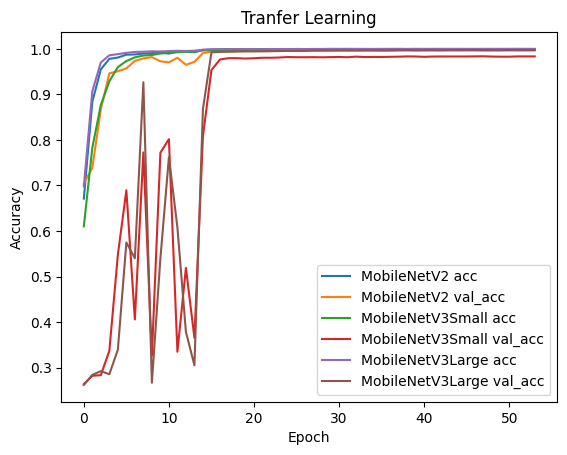

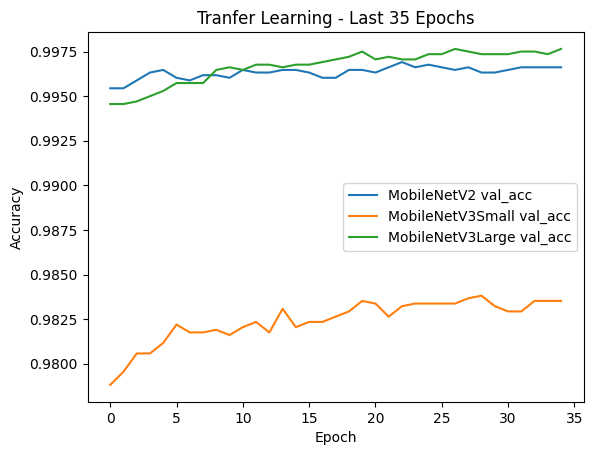

In [31]:
import json
# Import matplotlib
import matplotlib.pyplot as plt

# JSON file
files = [open ('training-results/MobileNetV2.json', "r"), open ('training-results/MobileNetV3Small.json', "r"), open ('training-results/MobileNetV3Large.json', "r")]
# Reading from file

data = [json.load(f) for f in files]

for d in data:
	# Plot the graph using ['accuracy'] and ['val_accuracy']
	plt.plot(d['accuracy'], label=d['BaseModelName'] + ' acc')
	plt.plot(d['val_accuracy'], label=d['BaseModelName'] + ' val_acc')
	# Print the maximum accuracy
	print(d['BaseModelName'] +' Maximum validation accuracy: ', max(d['val_accuracy']))
plt.title('Tranfer Learning')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')
plt.show()

for d in data:
	# Plot the last 35 epochs
	plt.plot(d['val_accuracy'][-35:], label=d['BaseModelName'] + ' val_acc')

plt.title('Tranfer Learning - Last 35 Epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='center right')
# Close the file
for f in files:
	f.close()



Minimum loss:  4.534683102974668e-05
Minimum validation loss:  0.005713172722607851


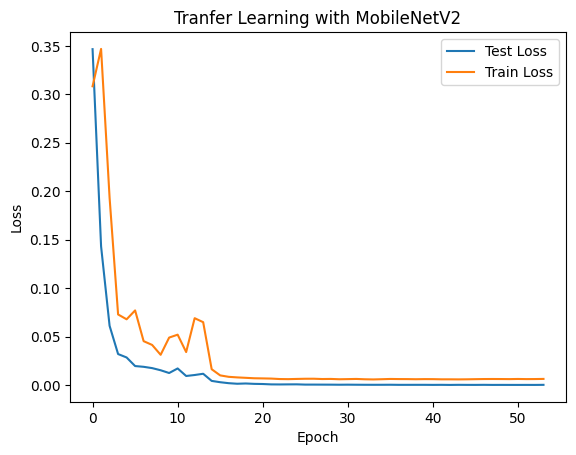

In [12]:
# Print the loss
plt.plot(data['loss'])
plt.plot(data['val_loss'])
plt.title('Tranfer Learning with MobileNetV2')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend({'Train Loss', 'Test Loss'}, loc='upper right')

# Print the minimum loss
print('Minimum loss: ', min(data['loss']))
print('Minimum validation loss: ', min(data['val_loss']))
